In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
zero = np.zeros((100,10))

In [3]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('csv_results/result_29.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,ARMA,Order,ARMA_Train_loss,ARMA_Valid_loss,Informer,Informer_para,Informer_lr,RNN
0,2,"[0.42351003518347574, 0.12974535061302717, -0....","[-0.36194846283880056, 0.39272924901113815, -0...","[-0.35161819924178433, 0.3750546674275113, -0....","(0, 0, 1)",0.348025,0.417385,"[-0.48006752, 0.3725012, -0.025207851, -0.0477...","(10, 2)",0.0001,"[-0.48403775691986084, 0.2215178906917572, 0.0..."
1,4,"[0.8966654802426408, 0.23923482266421692, 0.31...","[-0.03939659784008054, 0.4680310390413607, -0....","[-0.02266500542593982, 0.5072643524053161, -0....","(0, 0, 1)",0.326335,0.445070,"[-0.18444884, 0.46020916, 0.093028896, 0.02012...","(50, 10)",0.0001,"[-0.009221389889717102, 0.3141149878501892, -0..."
2,1,"[0.9951339748308184, -0.27150072825643334, -0....","[0.29958452217912546, 0.3477747263258465, -0.3...","[0.29642533631320983, 0.34250049727327475, -0....","(0, 0, 1)",0.321855,0.418689,"[0.21632743, 0.18815851, -0.23330516, -0.60755...","(50, 10)",0.0001,"[0.30852678418159485, 0.3231264650821686, -0.3..."
3,6,"[-0.31621842619985396, -0.5864140121468092, 0....","[0.13118000151051445, -0.2236992138551842, -0....","[0.12984269212968927, -0.22024125229110617, -0...","(0, 0, 1)",0.338587,0.452258,"[0.21434005, -0.1734016, -0.25748447, 0.224179...","(10, 2)",0.0001,"[0.20477038621902466, -0.052877604961395264, -..."
4,7,"[-0.5268640879587638, -0.11820934313050402, -0...","[-0.48064919394393457, -0.023107447007414628, ...","[-0.42809736780793156, -0.04307285457758213, -...","(0, 0, 1)",0.309933,0.403800,"[-0.49682802, 0.078933924, 0.23845614, 0.21140...","(10, 2)",0.0001,"[-0.41225486993789673, -0.035578224807977676, ..."
...,...,...,...,...,...,...,...,...,...,...,...
95,96,"[-0.9743935275460671, 0.07788971459447835, 0.7...","[-0.19373135929534713, -0.39033108412536, 0.23...","[-0.18819589415178173, -0.41242170146351104, 0...","(0, 0, 1)",0.325432,0.431136,"[-0.14806896, -0.4895054, 0.25285596, 0.373282...","(20, 4)",0.0001,"[-0.23685434460639954, -0.42200782895088196, 0..."
96,90,"[1.0074937450172285, 1.0870787610307144, 1.306...","[0.07089400229286735, 0.46829987136218054, 0.3...","[0.06582936471512736, 0.4847607633553246, 0.31...","(0, 0, 1)",0.337334,0.446541,"[0.16359735, 0.4230053, 0.34988725, 0.4042754,...","(20, 4)",0.0001,"[0.012103453278541565, 0.5089637041091919, 0.3..."
97,99,"[-0.5907490053019517, 0.7142554066112464, -0.2...","[-0.058004933349960375, -0.2663720359759957, 0...","[-0.05818418434083945, -0.26490741516940974, 0...","(0, 0, 1)",0.320695,0.391140,"[-0.17521308, -0.4432795, 0.5085975, -0.351965...","(20, 4)",0.0001,"[0.3055708110332489, -0.16744975745677948, 0.4..."
98,100,"[0.42575812617920117, -0.45754009692639364, -0...","[-0.09094403267893214, 0.25835107942906665, -0...","[-0.07295371527598218, 0.233573864732105, -0.3...","(0, 0, 1)",0.325837,0.412461,"[-0.08029972, 0.2069751, -0.34109908, -0.24732...","(10, 2)",0.0001,"[-0.17320454120635986, 0.15278249979019165, -0..."


In [4]:
# ar_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# ar_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [5]:
zero_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')
zero_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')

In [6]:
informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [7]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([10, 50, 50, 10, 10, 50, 50, 10, 10, 50, 10, 10, 10, 20, 10, 50, 50,
       20, 10, 20, 50, 20, 10, 10, 10, 20, 20, 10, 10, 20, 20, 10, 20, 10,
       20, 20, 20, 10, 10, 10, 20, 50, 20, 50, 10, 50, 20, 50, 50, 50, 10,
       10, 50, 10, 10, 10, 10, 20, 20, 50, 20, 10, 20, 50, 50, 50, 50, 10,
       20, 20, 20, 10, 10, 50, 10, 20, 20, 10, 50, 50, 50, 20, 20, 20, 10,
       20, 20, 50, 50, 50, 10, 10, 20, 20, 10, 20, 20, 20, 10, 50])

In [8]:
informer_lr_select

array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001])

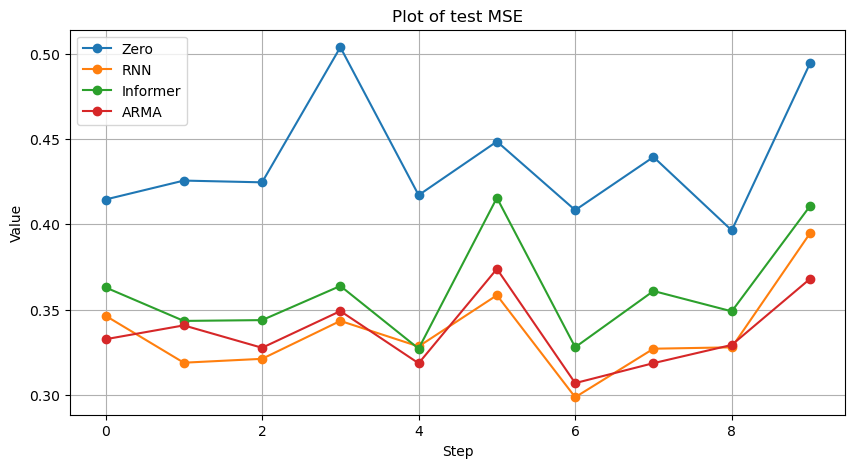

In [9]:


# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(zero_mse,label = 'Zero', marker='o')
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


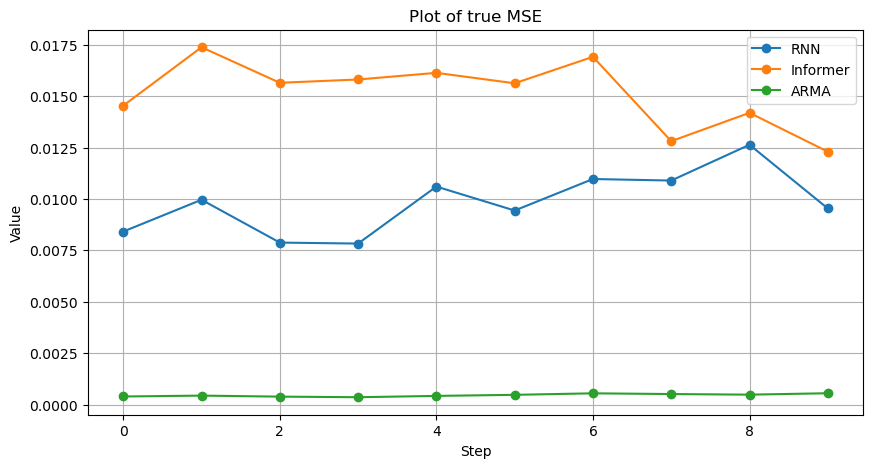

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(zero_mse_true,label = 'Zero', marker='o')
plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


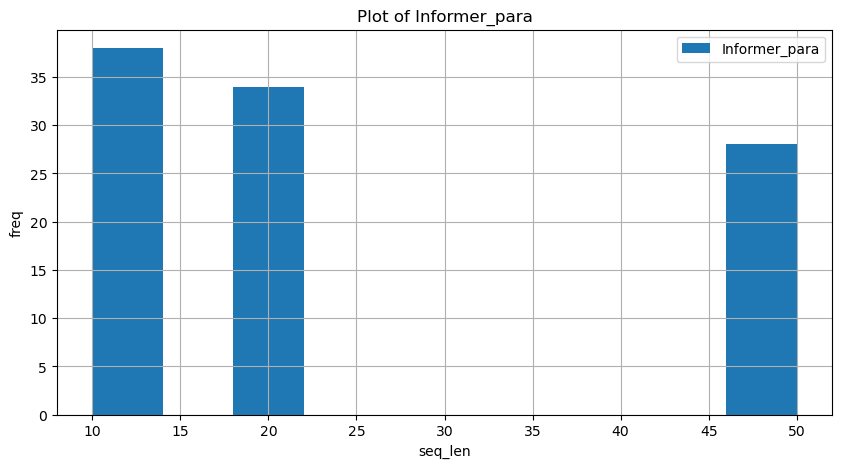

In [11]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

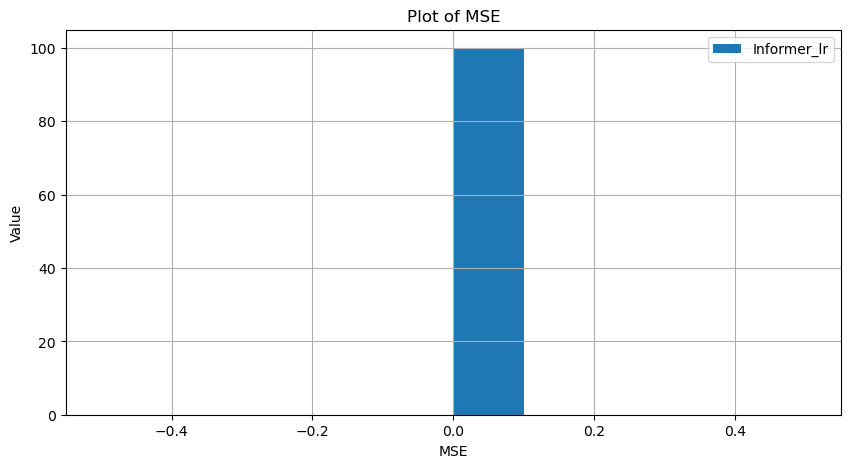

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()